In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle


class nlp_preprocessor:
   
    def __init__(self, vectorizer=CountVectorizer(), tokenizer=None, cleaning_function=None, 
                 stemmer=None, model=None):
        """
        A class for pipelining our data in NLP problems. The user provides a series of 
        tools, and this class manages all of the training, transforming, and modification
        of the text data.
        ---
        Inputs:
        vectorizer: the model to use for vectorization of text data
        tokenizer: The tokenizer to use, if none defaults to split on spaces
        cleaning_function: how to clean the data, if None, defaults to the in built class
        """
        if not tokenizer:
            tokenizer = self.splitter
        if not cleaning_function:
            cleaning_function = self.clean_text
        self.stemmer = stemmer
        self.tokenizer = tokenizer
        self.model = model
        self.cleaning_function = cleaning_function
        self.vectorizer = vectorizer
        self._is_fit = False
        
    def splitter(self, text):
        """
        Default tokenizer that splits on spaces naively
        """
        return text.split(' ')
        
    def clean_text(self, text, tokenizer, stemmer):
        """
        A naive function to lowercase all works can clean them quickly.
        This is the default behavior if no other cleaning function is specified
        """
        cleaned_text = []
        for post in text:
            cleaned_words = []
            for word in tokenizer(post):
                low_word = word.lower()
                if stemmer:
                    low_word = stemmer.stem(low_word)
                cleaned_words.append(low_word)
            cleaned_text.append(' '.join(cleaned_words))
        return cleaned_text
    
    def fit(self, text):
        """
        Cleans the data and then fits the vectorizer with
        the user provided text
        """
        clean_text = self.cleaning_function(text, self.tokenizer, self.stemmer)
        self.vectorizer.fit(clean_text)
        self._is_fit = True
        
    def transform(self, text):
        """
        Cleans any provided data and then transforms the data into
        a vectorized format based on the fit function. Returns the
        vectorized form of the data.
        """
        if not self._is_fit:
            raise ValueError("Must fit the models before transforming!")
        clean_text = self.cleaning_function(text, self.tokenizer, self.stemmer)
        return self.vectorizer.transform(clean_text)
    
    def save_pipe(self, filename):
        """
        Writes the attributes of the pipeline to a file
        allowing a pipeline to be loaded later with the
        pre-trained pieces in place.
        """
        if type(filename) != str:
            raise TypeError("filename must be a string")
        pickle.dump(self.__dict__, open(filename+".mdl",'wb'))
        
    def load_pipe(self, filename):
        """
        Writes the attributes of the pipeline to a file
        allowing a pipeline to be loaded later with the
        pre-trained pieces in place.
        """
        if type(filename) != str:
            raise TypeError("filename must be a string")
        if filename[-4:] != '.mdl':
            filename += '.mdl'
        self.__dict__ = pickle.load(open(filename,'rb'))

In [4]:
import pandas as pd

def convert_ids(ids_in_csv):
    return pd.to_numeric(ids_in_csv, errors='coerce').astype('int64')

movies_metadata_df = pd.read_csv('../data/the-movies-dataset/movies_metadata.csv'
                        , converters={'id': lambda x: convert_ids(x), 'imdb_id': lambda x: convert_ids(x)}
                       ,usecols=['id', 'original_title'
                                 , 'genres', 'homepage'
                                 ,'overview', 'popularity', 'poster_path'
                                 , 'release_date', 'revenue', 'runtime'
                                 ,'spoken_languages','tagline', 'title'
                                 ,'vote_average', 'vote_count'])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
import re
def clean(text, tokenizer, stemmer):
    """
    Cleans Text with Regexes
    :param text:
    :return: text:
    """
    doc = ''.join(text).lower()
    doc = re.sub(r'[<>\{}/;|\[\]-]', ' ', doc)
    doc = re.sub(r'[0-9]', ' ', doc)
    doc = re.sub(r'\'', ' ', doc)
    doc = re.sub(r'=', ' ', doc)
    doc = re.sub(r':', ' ', doc)
    doc = re.sub(r'"', ' ', doc)
    doc = re.sub(r'\s+', ' ', doc)
    doc = re.sub(r'\(', ' ', doc)
    doc = re.sub(r'\)', ' ', doc)
    doc = re.sub(r'\s{2,}', ' ', doc)
    doc = re.sub(r'\.', '', doc)
    doc = re.sub(r',', '', doc)

    return doc

In [24]:
# stop = True
# test_group = movies_metadata_df.overview.iloc[0:5] 
# for mov in test_group:
#     print(clean(mov))
#     print()

led by woody andy s toys live happily in his room until andy s birthday brings buzz lightyear onto the scene afraid of losing his place in andy s heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo eventually learns to put aside their differences

when siblings judy and peter discover an enchanted board game that opens the door to a magical world they unwittingly invite alan an adult who s been trapped inside the game for years into their living room alan s only hope for freedom is to finish the game which proves risky as all three find themselves running from giant rhinoceroses evil monkeys and other terrifying creatures

a family wedding reignites the ancient feud between next door neighbors and fishing buddies john and max meanwhile a sultry italian divorcée opens a restaurant at the local bait shop alarming the locals who worry she ll scare the fish away but she s less interested in seafood than she is in cooking up a hot time with

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

nlp_pp = nlp_preprocessor(TfidfVectorizer(stop_words='english'), cleaning_function=clean)

In [7]:
corpus = ' '
sentences = [str(sentence) for sentence in movies_metadata_df.overview.tolist()]

In [55]:
#corpus = corpus.join(sentences)

In [8]:
cv_tfidf = TfidfVectorizer(min_df=5, stop_words='english') #ngram_range=(1,2), 

In [9]:
X_tfidf = cv_tfidf.fit_transform(sentences).toarray()

In [10]:
tfidf_model_df = pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [28]:
#tfidf_model_df.head()

,00,000,007,01,10,100,1000,100th,101,108,...,état,étienne,être,его,из,когда,на,не,но,по
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
svd = TruncatedSVD(n_components=20)

In [13]:
X = svd.fit_transform(tfidf_model_df)

In [14]:
print(svd.explained_variance_ratio_.sum())
    

0.04441802681421798


In [16]:
#Clustering and recommend
tfidf_model_df.iloc[:2,357:1000]

,absolute,absolutely,absorb,absorbed,absorbing,absorbs,abstract,absurd,absurdist,absurdities,...,angola,angrily,angry,angst,anguish,anguished,angus,angèle,anil,animal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X[0]

array([ 2.17969868e-05,  3.85215899e-02,  8.90781767e-06,  1.92924133e-04,
       -1.09531377e-02,  7.57031745e-04,  2.18460198e-03, -3.80450218e-03,
        6.16368052e-03, -2.18965604e-03, -9.42475031e-03, -3.01803408e-03,
       -5.62747177e-03, -1.09680542e-02,  2.87797124e-03])

In [129]:
km = KMeans(n_clusters=100, init='k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 275.2206294957332
start iteration
done sorting
end inner loop
Iteration 1, inertia 260.9353503246673
start iteration
done sorting
end inner loop
Iteration 2, inertia 256.5945258448286
start iteration
done sorting
end inner loop
Iteration 3, inertia 254.2633361279015
start iteration
done sorting
end inner loop
Iteration 4, inertia 252.80893502472742
start iteration
done sorting
end inner loop
Iteration 5, inertia 251.87064413441263
start iteration
done sorting
end inner loop
Iteration 6, inertia 251.1354013241524
start iteration
done sorting
end inner loop
Iteration 7, inertia 250.4792218021948
start iteration
done sorting
end inner loop
Iteration 8, inertia 249.9183973371154
start iteration
done sorting
end inner loop
Iteration 9, inertia 249.46497573339155
start iteration
done sorting
end inner loop
Iteration 10, inertia 249.13457701912486
start iteration
done sorting
end inner loop
Iteration 11, 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=100, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [18]:
clustered = zip(tfidf_model_df.index.values, km.labels_)

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

In [20]:
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)

TypeError: fit() missing 1 required positional argument: 'y'

In [21]:
movies_2d_projection = pca.fit(X).transform(X)

In [22]:
movies_2d_projection

array([[-0.01762281,  0.00274923],
       [-0.02113273, -0.00110745],
       [-0.0198591 , -0.00194584],
       ...,
       [-0.01822606,  0.00291116],
       [-0.02251694, -0.00612024],
       [-0.01889061,  0.00139204]])

In [23]:
import seaborn as sns

In [24]:
x_vals_for_projection = [val[0] for val in movies_2d_projection]
y_vals_for_projection = [val[1] for val in movies_2d_projection]

In [26]:
import matplotlib.pyplot as plt

(-0.1, 0.4)

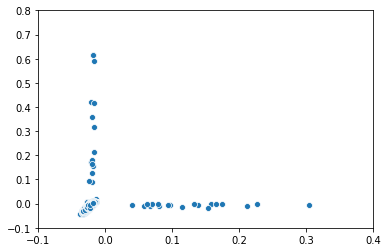

In [30]:
sns.scatterplot(x=x_vals_for_projection, y=y_vals_for_projection)
plt.ylim(-0.1, 0.8)
plt.xlim(-0.1, 0.4)

# Create a dictionary of the clusters and their members

In [65]:
clustered = zip(km.labels_, movies_metadata_df['id'])#zip(tfidf_model_df.index.values, km.labels_)

In [68]:
from collections import defaultdict
movie_summaries_clustered = defaultdict(list)

for cluster, movie_id in clustered:
    movie_summaries_clustered[cluster].append(movie_id)

In [131]:
cluster_distribution = [len(movies) for (clust, movies) in movie_summaries_clustered.items()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1bec337198>]],
      dtype=object)

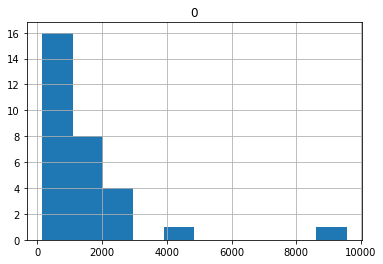

In [132]:
pd.DataFrame(cluster_distribution).hist()

In [98]:
len(movie_summaries_clustered)

30

In [115]:
def get_cluster_number(movie, cluster_zip):

    for cluster, movie_id in cluster_zip:
        
        if movie_id == movie:
            return cluster
    
    raise Exception('Movie not found in cluster')

In [130]:
clustered = zip(km.labels_, movies_metadata_df['id'])#zip(tfidf_model_df.index.values, km.labels_)
get_cluster_number(862, clustered)

90

In [124]:
def get_movie_name(movie_id):
    return movies_metadata_df[movies_metadata_df.id == movie_id]['original_title'].iloc[0]

def get_all_movies_in_cluster(cluster_number, cluster_dict):
    
    movies = cluster_dict[cluster_number]
    return [get_movie_name(mov) for mov in movies]


In [141]:
get_all_movies_in_cluster(20, movie_summaries_clustered)

['It Takes Two',
 'Mighty Aphrodite',
 'Le confessionnal',
 'Bio-Dome',
 'Two Bits',
 'Before and After',
 'Man of the Year',
 'Casper',
 'Утомлённые солнцем',
 'Far from Home: The Adventures of Yellow Dog',
 'The Hunted',
 'Losing Isaiah',
 'The Underneath',
 'The Crow',
 'A Low Down Dirty Shame',
 'A Bronx Tale',
 'Cliffhanger',
 '霸王别姬',
 'The Favor',
 'Getting Even with Dad',
 'Killing Zoe',
 'Life With Mikey',
 'Mr. Wonderful',
 'Naked',
 'The Secret Garden',
 'The Nightmare Before Christmas',
 'The Pagemaster',
 'Kådisbellan',
 'Métisse',
 'Home Alone',
 'Terminator 2: Judgment Day',
 'Окно в Париж',
 'Ma saison préférée',
 'Jack & Sarah',
 'Un indien dans la ville',
 'Roula - Dunkle Geheimnisse',
 'অপুর সংসার',
 'Careful',
 'A Month by the Lake',
 'Kingpin',
 'La mort en ce jardin',
 'Bye-Bye',
 'Vertigo',
 'Gaslight',
 'Father of the Bride',
 'The Reluctant Debutante',
 'His Girl Friday',
 'Little Lord Fauntleroy',
 'Cat on a Hot Tin Roof',
 'Dangerous Ground',
 'Fly Away Home',